# mlpro-classification-bank-churn-2025

L’objectif de ce projet est de prédire si un client va continuer à utiliser les services de la banque ou s’il va clôturer son compte (churn)

 ## Overview

 L’objectif de ce projet est de prédire si un client va continuer à utiliser les services de la banque ou s’il va clôturer son compte (churn). Pour ce faire, nous disposons d’un ensemble de données clients contenant plusieurs caractéristiques démographiques, financières et comportementales. Nous devons développer un modèle de prédiction capable de déterminer, pour chaque client, s'il va résilier ou non car cela permet aux banques de mettre en place des stratégies de rétention efficaces.

## Description

Voici les explications pour chaque variable:

- Customer ID : Un identifiant unique pour chaque client
- Surname : Le nom de famille du client
- Credit Score : Une valeur numérique représentant le score de crédit du client
- Geography : Le pays où réside le client (France, Spain ou Germany)
- Gender : Le genre du client (Male or Female)
- Age : L’âge du client
- Tenure : Le nombre d’années pendant lesquelles le client est avec la banque
- Balance : Le solde du compte du client
- NumOfProducts : Le nombre de produits bancaires utilisés par le client (par exemple, compte d’épargne, carte de crédit)
- HasCrCard : Si le client possède une carte de crédit (1 = oui, 0 = non)
- IsActiveMember : Si le client est un membre actif (1 = oui, 0 = non)
- EstimatedSalary : Le salaire estimé du client
- Exited : Si le client a résilié (1 = oui, 0 = non)

## Evaluation

Pour évaluer les résultats, nous utiliserons le score F1.

## Submission

Pour chaque ID du test set, Vous devez prédire si oui (1) ou non (0) le client va clôturer son compte à la banque. Le fichier doit contenir deux colonnes, ID et Exited, en respectant ce format:

ID,Exited
- 2,0
- 5,0
- 6,1
- etc.

# Début du projet

### Import des packages

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import du jeu de données d'entraînement

In [13]:
df_train = pd.read_csv("train_data.csv")
df_train

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143574,97639,15759915,Onwumelu,559,Germany,Male,45.0,3,111634.29,1,1.0,1.0,103349.74,0
143575,95939,15769974,Shih,597,Germany,Male,41.0,10,119182.73,1,0.0,0.0,121299.14,0
143576,152315,15592028,Hsiao,576,Spain,Male,31.0,6,127299.56,1,1.0,1.0,57569.89,0
143577,117952,15804009,Ch'ang,751,France,Female,27.0,4,90721.11,1,0.0,0.0,84496.78,0


### Analyse des données

Résumé :
- On constate qu'il n'y a pas un énorme déséquilibre entre le nombres d'hommes et de femmes dans ce dataset
80966 hommes pour 62613 femmes.
- Les clients ayant entre 1 et 9 ans d’ancienneté sont majoritaires, avec des effectifs assez équilibrés.
- Les clients ayant moins d’un an (Tenure == 0) ou plus de 9 ans (Tenure == 10) sont sous-représentés.<br>
- La médiane de la répartition de l'ancienneté est centré à 5 ans, 50% des clients ont entre 3 et 7 ans d'ancienneté
Durée de vie de la banque ?
- Si la banque n’a que 10 ans, alors c’est normal de ne pas avoir plus d’ancienneté.
- Pareil pour Tenure == 0 : si on collecte les données en cours d’année, certains clients ne sont pas encore à 1 an
- La majorité des clients souscrivent à 1 ou 2 produits et très peu à plus de 2 produits.
- La majorité des clients se situe en France, l'allemagne et l'espagne ont un nombre équivalent de clients.
- La majorité des clients possèdent une carte de crédit. 




Questions :
- Est-ce que les hommes ont plus tendances à quitter la banque que les femmes ?
- Les nouveaux clients (Tenure = 0) quittent-ils plus facilement la banque ?
- Les clients très anciens (Tenure = 10) ont-ils aussi tendance à partir ?
- Quelles sont les clients les plus à risque de quitter la banques, ceux avec 1, 2, 3 ou 4 produits ?
- Dans quelle région les clients ont tendances à le plus partir ?
- Les clients possédant une carte de crédit ont ils plus tendances à partir que ceux n'en possédant pas ?

1) Détection des variables discrètes et continu
2) Analyse univarié
3) Analyse multivarié
4) Faire des hypothèses et les testées

- Variables discrètes : Gender, Tenure, NumOfProducts, Geography, HasCrCard, IsActiveMember, Exited, Geography
- Variables continues : CreditScore, Balance, EstimatedSalary, Age

In [41]:
df_train.nunique().sort_values()


Gender                  2
Exited                  2
HasCrCard               2
IsActiveMember          2
Geography               3
NumOfProducts           4
Tenure                 11
Age                    71
CreditScore           456
Surname              2765
CustomerId          22017
Balance             27258
EstimatedSalary     50076
ID                 143579
dtype: int64

#### Analyse Univariée

Des variables discrètes (value.count() et plot(kind="bar"))

Text(0.5, 0.98, 'Répartition des hommes et des femmes ce jeu de donnée')

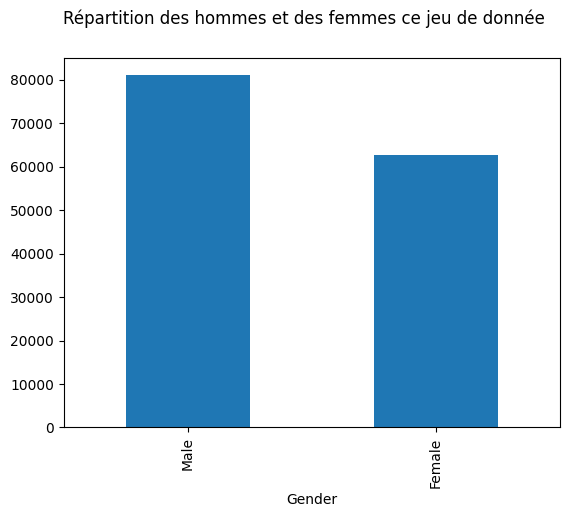

In [42]:
df_train["Gender"].value_counts().plot(kind="bar")
df_train["Gender"].value_counts()
plt.suptitle("Répartition des hommes et des femmes ce jeu de donnée")

On constate qu'il n'y a pas un énorme déséquilibre entre le nombres d'hommes et de femmes dans ce dataset
80966 hommes pour 62613 femmes.

Tenure
2     15766
7     15474
8     15272
4     15257
5     14984
1     14603
9     14557
3     14484
6     13716
10     5120
0      4346
Name: count, dtype: int64

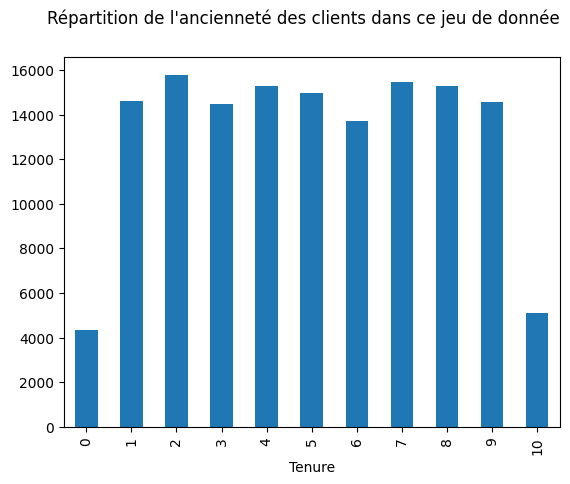

In [43]:
df_train["Tenure"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition de l'ancienneté des clients dans ce jeu de donnée")
df_train["Tenure"].value_counts()

Le nombre de clients entre 1 et 9 compris sont répartits de manières assez similaire. Il y a beacoup moins de client avec moins de 1 an d'ancienneté et aussi de plus de 9 ans d'ancienneté. Est ce que les nouveaux clients ont tendances à partir plus facilement ? et est ce que les clients de plus 9 ans d'ancienneté ont aussi tendances à partir ? (Dépuis quand existe la banque aussi, si elle a 10 ans c'est peut être normal, pour les moins de 1 an aussi si l'année n'est pas fini.)

Text(0.5, 0.98, 'Répartition de la variable Tenure dans ce jeu de donnée')

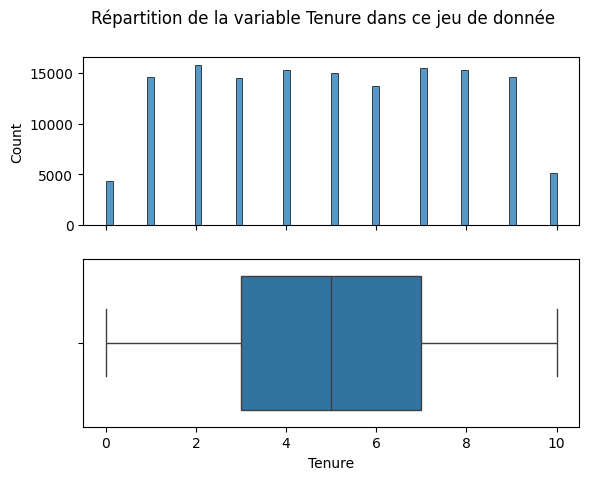

In [44]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df_train, x="Tenure", ax=ax[0])
sns.boxplot(data=df_train, x="Tenure", ax=ax[1])
plt.suptitle("Répartition de la variable Tenure dans ce jeu de donnée")

LA médiane est bien centré à 5 ans ce qui montre une bonne répartition de l'ancienneté des clients<br>
50% des clients ont une ancienneté compris entre 3 et 7 ans. Il n'y a pas de valeurs aberrantes.

NumOfProducts
2    73301
1    67364
3     2510
4      404
Name: count, dtype: int64

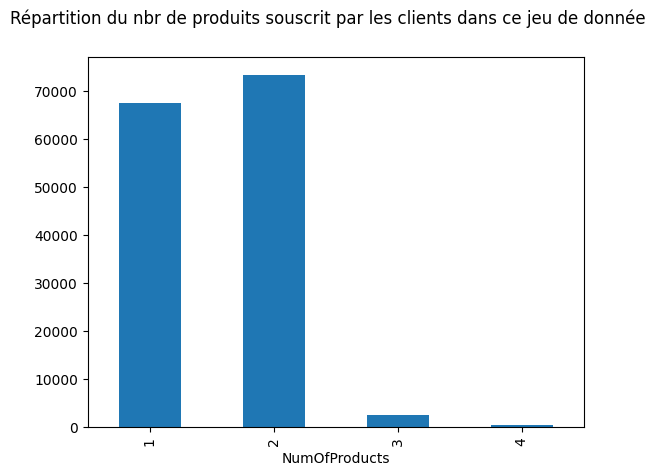

In [45]:
df_train["NumOfProducts"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition du nbr de produits souscrit par les clients dans ce jeu de donnée")
df_train["NumOfProducts"].value_counts()

- La majorité des clients souscrivent à 1 ou 2 produits et très peu à plus de 2 produits.
- Quelles sont les clients les plus à risque de quitter la banques, ceux avec 1, 2, 3 ou 4 produits ?

Geography
France     81886
Spain      31588
Germany    30105
Name: count, dtype: int64

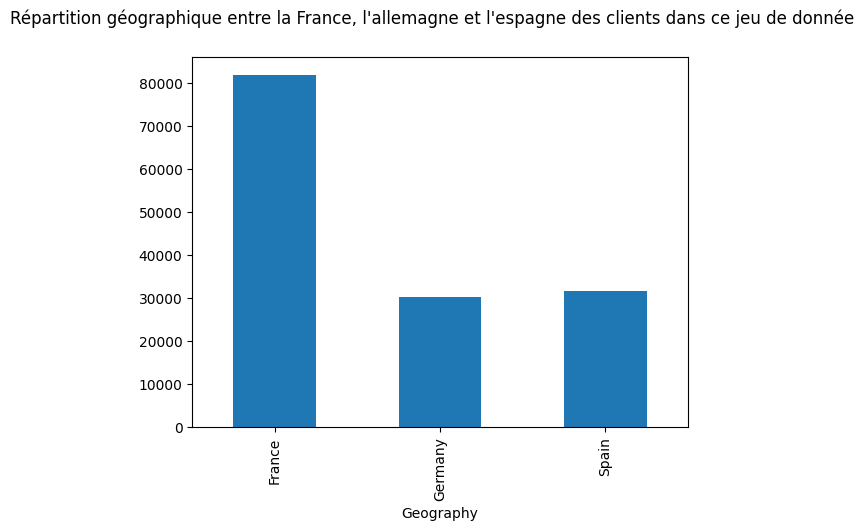

In [47]:
df_train["Geography"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition géographique entre la France, l'allemagne et l'espagne des clients dans ce jeu de donnée")
df_train["Geography"].value_counts()

- La majorité des clients se situe en France, l'allemagne et l'espagne ont un nombre équivalent de clients.
- Dans quelle région les clients ont tendances à le plus partir ?

HasCrCard
1.0    108274
0.0     35305
Name: count, dtype: int64

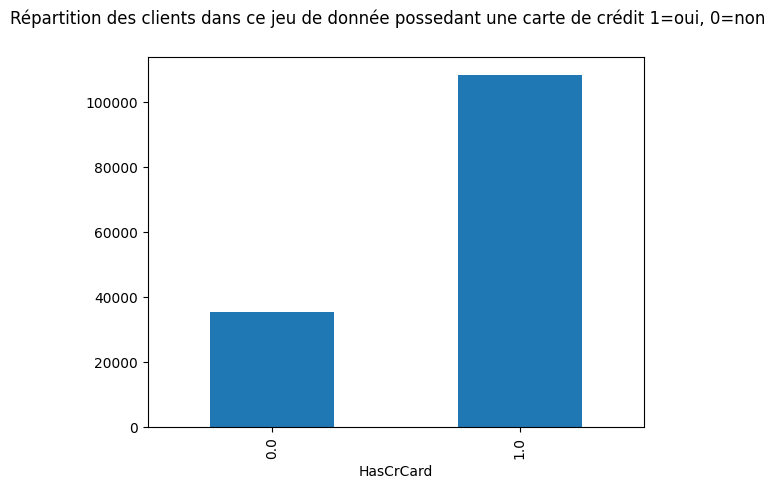

In [48]:
df_train["HasCrCard"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition des clients dans ce jeu de donnée possedant une carte de crédit 1=oui, 0=non")
df_train["HasCrCard"].value_counts()

La majorité des clients possèdent une carte de crédit. <br>
Les clients possédant une carte de crédit ont ils plus tendances à partir que ceux n'en possédant pas ?

IsActiveMember
0.0    72249
1.0    71330
Name: count, dtype: int64

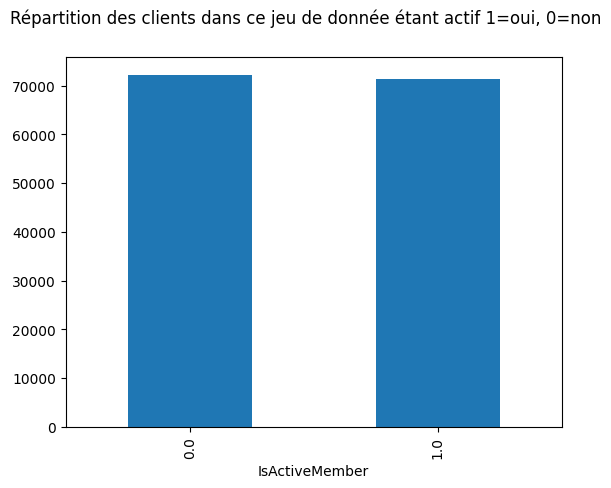

In [49]:
df_train["IsActiveMember"].value_counts().sort_index().plot(kind="bar")
plt.suptitle("Répartition des clients dans ce jeu de donnée étant actif 1=oui, 0=non")
df_train["IsActiveMember"].value_counts()

